# App Store and Google Play Deep Dive

The goal of this project is to identify profitable mobile apps and what characteristics drive their popularity. We work for a company that develops apps for the Android and iOS markets, specifically free to download apps. Being free to download, the profitability of our apps is entirely dependant on the ad revenue generated by consumer usage. So more popular and highly rated apps will produce more revenue. Our job is to research past apps with these qualities and help our team make data driven decisions on the types of apps to develop in the future.

# Exploring the Datasets

Both the App Store and Google Play host ~2 million apps. Ideally we would want to inspect each and every one to draw the most well supported conclusions. However, aquiring all this data would be extremely expensive and exploring it would require enormous resources. So, to save us time and money we will instead be using free sample datasets from each marketplace. These should be fairly accurate representations of the apps on each platform and serve our purposes quite nicely. Below are short descriptions of each and a link to the source.

- [App Store Dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home): contains information scraped from 7,200 mobile iOS apps available on the Apple App Store
- [Google Play Dataset](https://www.kaggle.com/lava18/google-play-store-apps/home): contains information scraped from 10,000 mobile Android apps available on the Google Play Store

Below we will first explore our datasets by reading in the files and visualizing small samples of each.

In [1]:
from csv import reader

# App Store Dataset
opened_file = open('AppleStore.csv', encoding = 'utf8')
read_file = reader(opened_file)
ios_data = list(read_file)
ios_headers, ios_data = ios_data[0], ios_data[1:]

# Google Play Dataset
opened_file = open('googleplaystore.csv', encoding = 'utf8')
read_file = reader(opened_file)
android_data = list(read_file)
android_headers, android_data = android_data[0], android_data[1:]

To help us visualize our data we created the `explore_data()` function below. This will allow us to easily print a sample of rows and the total size of each dataset in a readable fashion.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
# Sample of Apple Store data and headers
print(ios_headers,'\n')
explore_data(ios_data, 0, 3, True)

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'] 

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


Number of rows: 7197
Number of columns: 16


In [4]:
#Sample of Google Play data and headers
print(android_headers,'\n')
explore_data(android_data, 0,3, True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


## Field Observations

From the above samples we see that we have 16 fields from the App Store dataset and 13 fields from the Google Play dataset to work with. Not all of these columns will be of use to us. Recall that our company develops free to dowload apps and our profits are driven by customer usage based ad revenue. With this in mind, below are the types of columns in our data that will be of interest to us for filtering our data:

- App Store Fields: *price, rating_count_tot, rating_count_ver*
- Google Play Fields: *Price, Reviews, Installs*

In addition to the above fields, there are several other columns that may be of interest to us for segmenting out the characteristics that make an app popular. These attributes can include:

- App Store Fields: *size_bytes, user_rating, user_rating_ver, cont_rating, prime_genre, sup_devices.num, ipadSc_urls.num, lang.num*
- Google Play Fields: *Rating, Size, Type, Content Rating, Genres*

# Cleansing and Filtering our Data

Now that we have an idea of the data and relevant fields to work with, we need to verify the integrity of our data. As is best practice, we will check that all our records are accurate and unique, otherwise we have the potential to draw false conclusions from our data. Furthermore, we will use this time to filter out irrelevant apps from our data set. Specifically apps that are not free to download and not English based (since our company only develops free English language apps).

## Removing Incorrect Data

Below we will first remove incorrect data from each of our data sets. This will include removing rows that do not follow the same structure/format as the rest of the dataset, as well as extraneous records that have false information.

In [5]:
### Removing improperly formatted rows by looping over datasets and checking record lengths.

# App Store
ios_incorrect_records = []
correct_length = len(ios_headers)
for i in range(len(ios_data)):
    current_record = ios_data.pop(0)
    if len(current_record) == correct_length:
        ios_data.append(current_record)
    else:
        ios_incorrect_records.append(current_record)
        
# Google Play
android_incorrect_records = []
correct_length = len(android_headers)
for i in range(len(android_data)):
    current_record = android_data.pop(0)
    if len(current_record) == correct_length:
        android_data.append(current_record)
    else:
        android_incorrect_records.append(current_record)

print('Number of Incorrect App Store Rows: ',len(ios_incorrect_records))
print('Number of Incorrect Google Play Rows: ',len(android_incorrect_records),'\n')
print('Number of Remaining App Store Rows: ', len(ios_data))
print('Number of Remaining Google Play Rows: ', len(android_data))
    

Number of Incorrect App Store Rows:  0
Number of Incorrect Google Play Rows:  1 

Number of Remaining App Store Rows:  7197
Number of Remaining Google Play Rows:  10840


In [6]:
print(android_incorrect_records)

[['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']]


Above we see that there is only 1 improperly formatted record in our datasets, specifically for the app *Life Made WI-FI Touchsreen Photo Frame* from the Google Play store. Comparing the record to the earlier samples we see that the *Category* field is missing. Furthermore, we can confirm our removal results by consulting the data source's [discussin section](https://www.kaggle.com/lava18/google-play-store-apps/discussion) where several other users have identified this record as incorrect.

## Removing Duplicate Data

Next we will ensure that each record in our datasets is unique by identifying the apps that appear more than once. We will not want to remove the app entirely, so we will also need to decide which record to keep once duplicates are identified. Intuitely, it would make the most sense to keep the most up-to-date or "newest" record. The datasets do not include timestamps, but they do include the number of user reviews. The number of reviews can only increase over time, so it is safe to assume that the record with more reviews must be the most recent record, and therefore will be the one we keep. 

Below we follow this methodology, first identifying the apps with duplicate records, and secondly retaining the record with the most reviews.

### Part 1: Identifying Duplicates


In [7]:
#Identifying duplicates by looping over datasets and finding rows with the same app name

# App Store
ios_app_frequencies = {}    # Dictionary of apps: key = name and value = list of frequency, max reviews, and a list of records
ios_n_uniques = 0
ios_n_duplicates = 0
for app in ios_data:
    name = app[1]
    reviews = int(app[5])
    if name in ios_app_frequencies:
        ios_app_frequencies[name][0] += 1                                          # Keeps frequency count
        ios_app_frequencies[name][1] = max(reviews, ios_app_frequencies[name][1])  # Records max review count
        ios_app_frequencies[name][2].append(app)                                   # Stores each record for given app name
        ios_n_duplicates += 1                                                      # Keeps count of duplicates
    else:
        ios_app_frequencies[name] = [1, reviews, [app]]                            # Initializes first record for given app
        ios_n_uniques += 1                                                         # Keeps count of unique apps

# Google Play
android_app_frequencies = {}
android_n_uniques = 0
android_n_duplicates = 0
for app in android_data:
    name = app[0]
    reviews = int(app[3])
    if name in android_app_frequencies:
        android_app_frequencies[name][0] += 1
        android_app_frequencies[name][1] = max(reviews, android_app_frequencies[name][1])
        android_app_frequencies[name][2].append(app)
        android_n_duplicates += 1
    else:
        android_app_frequencies[name] = [1, reviews,[app]]
        android_n_uniques += 1

print('App Store   - # of Unique Records: ',ios_n_uniques,'    |    # of Duplicate Records: ',ios_n_duplicates)
print('Google Play - # of Unique Records: ',android_n_uniques,'    |    # of Duplicate Records: ',android_n_duplicates)

App Store   - # of Unique Records:  7195     |    # of Duplicate Records:  2
Google Play - # of Unique Records:  9659     |    # of Duplicate Records:  1181


#### Duplicate Samples
Below shows some of the apps with duplicates, how many records they have, and a sample of their duplicates.

In [8]:
# App Store
print('Sample of Duplicate App Store Apps\n\n')
sample_size, count = 2, 0
for name in ios_app_frequencies:
    frequency = ios_app_frequencies[name][0]
    if frequency > 1:
        count += 1
        print('App Name: ',name)
        print('# of Duplicate Records: ',frequency,'\n')
        explore_data(ios_app_frequencies[name][2], 0, frequency)
    if count >= sample_size:
        break

Sample of Duplicate App Store Apps


App Name:  Mannequin Challenge
# of Duplicate Records:  2 

['1173990889', 'Mannequin Challenge', '109705216', 'USD', '0.0', '668', '87', '3.0', '3.0', '1.4', '9+', 'Games', '37', '4', '1', '1']


['1178454060', 'Mannequin Challenge', '59572224', 'USD', '0.0', '105', '58', '4.0', '4.5', '1.0.1', '4+', 'Games', '38', '5', '1', '1']


App Name:  VR Roller Coaster
# of Duplicate Records:  2 

['952877179', 'VR Roller Coaster', '169523200', 'USD', '0.0', '107', '102', '3.5', '3.5', '2.0.0', '4+', 'Games', '37', '5', '1', '1']


['1089824278', 'VR Roller Coaster', '240964608', 'USD', '0.0', '67', '44', '3.5', '4.0', '0.81', '4+', 'Games', '38', '0', '1', '1']




In [9]:
# Google Play
print('Sample of Duplicate Google Play Apps\n\n')
sample_size, count = 2, 0
for name in android_app_frequencies:
    frequency = android_app_frequencies[name][0]
    if frequency > 1:
        count += 1
        print('App Name: ',name)
        print('# of Duplicate Records: ',frequency,'\n')
        explore_data(android_app_frequencies[name][2], 0, frequency)
    if count >= sample_size:
        break

Sample of Duplicate Google Play Apps


App Name:  Coloring book moana
# of Duplicate Records:  2 

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['Coloring book moana', 'FAMILY', '3.9', '974', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


App Name:  Mcqueen Coloring pages
# of Duplicate Records:  2 

['Mcqueen Coloring pages', 'ART_AND_DESIGN', 'NaN', '61', '7.0M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Action & Adventure', 'March 7, 2018', '1.0.0', '4.1 and up']


['Mcqueen Coloring pages', 'FAMILY', 'NaN', '65', '7.0M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Action & Adventure', 'March 7, 2018', '1.0.0', '4.1 and up']




### Part 2: Removing Duplicates and Keeping Record with Most Reviews

In [10]:
# Here we build our new "cleaned" dataset by looping over our dictionaries of iOS and android apps.
# If the frequency of the app = 1, then it is unique and we keep it. Otherwise the app has duplicates,
# so we will only keep the record with the max reviews.

# App Store
ios_data = []
for name in ios_app_frequencies:
    frequency = ios_app_frequencies[name][0]
    max_reviews = ios_app_frequencies[name][1]
    records = ios_app_frequencies[name][2]
    if frequency == 1:
        ios_data.append(records[0])
    else:
        for record in records:
            reviews = int(record[5])
            
            
            if reviews == max_reviews:
                ios_data.append(record)
                break
                                
# Google Play
android_data = []
for name in android_app_frequencies:
    frequency = android_app_frequencies[name][0]
    max_reviews = android_app_frequencies[name][1]
    records = android_app_frequencies[name][2]
    if frequency == 1:
        android_data.append(records[0])
    else:
        for record in records:
            reviews = int(record[3])
            if reviews == max_reviews:
                android_data.append(record)
                break
                
print('Expected # of Unique Records -     App Store: ', ios_n_uniques, '    |    Google Play: ', android_n_uniques)
print('Actual # of Remaing Records  -     App Store: ', len(ios_data), '    |    Google Play: ', len(android_data))

Expected # of Unique Records -     App Store:  7195     |    Google Play:  9659
Actual # of Remaing Records  -     App Store:  7195     |    Google Play:  9659


## Removing Non-English Apps

As mentioned before, the company we work for only develops apps for primary English speaking users. Therefore, it makes sense for us to filter out any non-English language apps from our dataset, so that we only analyse those applicable to our team.

### Part 1: Determining If Apps Are English

Intuitively, the easiest way to determine the primary language of an app is by looking at its name. If the name has any non-English language characters in the name, then we can assume it is not English and should be removed. For example, below are a few apps we found in our dataset that have non-English characters and should clearly be removed.

In [11]:
print(android_data[870][0])
print(android_data[3644][0])
print(android_data[4547][0])
print(android_data[8188][0])
print(android_data[8949][0])

İşCep
RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템
中国語 AQリスニング
أحداث وحقائق | خبر عاجل في اخبار العالم
哈哈姆特不EY


As we can see, most of the characters in these names are non-English. Our first inclination might just be to remove any names with these types of characters. However, if one takes the time to look through the datasets, they will find several primarily English based apps with non-English characters in their names. Below are a few examples.

In [12]:
print(android_data[7363][0])
print(android_data[1175][0])
print(android_data[1255][0])
print(android_data[2555][0])
print(android_data[3360][0])

Lep's World 3 🍀🍀🍀
Homes.com 🏠 For Sale, Rent
Super Funny Ringtones 2018 🔔
Puzzle Alarm Clock ⏰
Instachat 😜


It seems we need to both remove the non-English apps while retaining the English apps that only contain a few extraneous characters. To accomplish this, we will create a function that identifies if a string has 3 or more non-English characters. The function will take in any string as an input and return "False" if the name has 3 or more of these extraneous characters and "True" otherwise. Note that we use the built in python function `ord()` to determine whether each string character is English. Namely, we consider any character with `ord() > 127` to be non-English (according to [ASCII](https://en.wikipedia.org/wiki/ASCII) the majority of characters used in English text are between 0 and 126). Below is the definition of this function and an example of us testing it on several of the above app names.

In [13]:
def is_English(app_name):
    non_english_count = 0
    is_english = True
    for c in app_name:
        if ord(c) > 127:
            non_english_count += 1
        if non_english_count > 3:
            is_english = False
            break
    return is_english

print(is_English('İşCep'))
print(is_English('中国語 AQリスニング'))
print(is_English('أحداث وحقائق | خبر عاجل في اخبار العالم'))
print(is_English("Lep's World 3 🍀🍀🍀"))
print(is_English('Puzzle Alarm Clock ⏰'))
print(is_English('Instachat 😜'))
            

True
False
False
True
True
True


From the above outputs, we can see that our function is not perfect. It returned `True` for the app name *İşCep* which is clearly non-English. Nonetheless, this function should minimize the number of non-Englis apps included in our analysis. 

### Part 2: Filtering to English Apps Using `is_English` Function
Below we apply our function to the App Store and Google Play datasets.

In [14]:
### Removing non-English apps by looping over datasets and checking app names using is_English function.

# App Store
ios_non_English = []
for i in range(len(ios_data)):
    current_record = ios_data.pop(0)
    app_name = current_record[1]
    if is_English(app_name):
        ios_data.append(current_record)
    else:
        ios_non_English.append(current_record)
        
# Google Play
android_non_English = []
for i in range(len(android_data)):
    current_record = android_data.pop(0)
    app_name = current_record[0]
    if is_English(app_name):
        android_data.append(current_record)
    else:
        android_non_English.append(current_record)

print('Number of non-English App Store Rows: ',len(ios_non_English))
print('Number of non-English Google Play Rows: ',len(android_non_English),'\n')
print('Number of Remaining App Store Rows: ', len(ios_data))
print('Number of Remaining Google Play Rows: ', len(android_data))

Number of non-English App Store Rows:  1014
Number of non-English Google Play Rows:  45 

Number of Remaining App Store Rows:  6181
Number of Remaining Google Play Rows:  9614


## Isolating Free Apps

Thus far we have removed incorrect, duplicate, and non-English records from our datasets. With these gone, the last thing we need to account for is the price of the apps. As mentioned before, our company only develops free-to-download apps, so we want to remove any apps that must be purchased at a cost to the user. Below we isolate only the apps with a price of 0 and remove the others from our datasets.

In [15]:
### Isolating free-to-download apps by looping over datasets and checking app price

# App Store
ios_not_free = []
for i in range(len(ios_data)):
    current_record = ios_data.pop(0)
    try:
        app_price = float(current_record[4])
    except ValueError:
        app_price = 1
    if app_price == 0:
        ios_data.append(current_record)
    else:
        ios_not_free.append(current_record)
        
# Google Play
android_not_free = []
for i in range(len(android_data)):
    current_record = android_data.pop(0)
    try:
        app_price = float(current_record[7])
    except ValueError:
        app_price = 1
    if app_price == 0:
        android_data.append(current_record)
    else:
        android_not_free.append(current_record)

print('Number of non-free App Store Rows: ',len(ios_not_free))
print('Number of non-free Google Play Rows: ',len(android_not_free),'\n')
print('Number of Remaining App Store Rows: ', len(ios_data))
print('Number of Remaining Google Play Rows: ', len(android_data))

Number of non-free App Store Rows:  2961
Number of non-free Google Play Rows:  750 

Number of Remaining App Store Rows:  3220
Number of Remaining Google Play Rows:  8864


# Analysis of Popular Free Apps

With the cleansing of our data complete, we have 3,220 App Store and 8,864 Google Play apps remaining for our analysis. In the rest of this project we will use these remaining records to understand and develop the kinds of apps that attract many users and generate ad revenue for our company. 

## Succesful App Profiles by Market
When developing new app ideas our company follows the following three steps to validate its potential and produce a final product:

1. Build a minimal Android version of the app, and add it to Google Play.
2. If the app has a good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Though the apps are first tested on the Google Play market, it is clear that our company intends for its apps to be succesful on both the App Store and Google Play markets. So to begin, we will want to understand the app genres that are popular on each market. Specifically, we might try to segment each dataset first by the primary app categories and content.

### Popular App Categories
Here we will look into which app categories and genres are most common and attract more users. Since the App Store and Google Play data have different category fields, we will be treating each dataset separately. Specifically, the App Store dataset only has the one one column *prime_genre* related to the genre of the app, while the Google Play dataset has two, *Ceategory* and *Genres*.

#### Part 1: App Store Genre Frequencies
To get an idea of which genres are most popular on the App Store, we will build a frequency table for the occurences of each primary genre in our dataset. Since we will most likely be be performing this excercise on the Google Play dataset as well, and possibly on different fields, lets go ahead and built a function that easily builds us our frequency tables. The function `freq_table` will require two inputs, the dataset being used and the index of the column of interest. The output will be a dictionary of all the unique field entries and their frequencies in the dataset expressed as a percentage.

In [16]:
# Defining function freq_table to be used later on our datasets

def freq_table(dataset, index):
    freq_dict = {}
    total = len(dataset)
    for row in dataset:
        field = row[index]
        try:
            freq_dict[field] += 1/total*100
        except KeyError:
            freq_dict[field] = 1/total*100
    return freq_dict

Now that we have a function to build the frequency tables, let's go ahead and build a function that prints them as well. This will allow us to easily visualize the tables and identify the more common segments for each dataset.

In [17]:
# Defining function diplay_table that prints the dictionaries generated by freq_table

def display_table(dataset, index):
    freq_dict = freq_table(dataset, index)
    for key in sorted(freq_dict, key = freq_dict.__getitem__, reverse = True):
        value = freq_dict[key]
        print(key,': ', value,'%')

Using the our new functions, lets now build a frequency table for the *prime_genre* field in our App Store dataset.

In [18]:
#Using display_table function to build frequency table for prime_genre column of App Store dataset

display_table(ios_data, 11) 

Games :  58.13664596273457 %
Entertainment :  7.888198757764019 %
Photo & Video :  4.968944099378889 %
Education :  3.66459627329192 %
Social Networking :  3.2919254658385046 %
Shopping :  2.6086956521739095 %
Utilities :  2.5155279503105556 %
Sports :  2.14285714285714 %
Music :  2.0496894409937862 %
Health & Fitness :  2.0186335403726683 %
Productivity :  1.7391304347826066 %
Lifestyle :  1.5838509316770168 %
News :  1.3354037267080732 %
Travel :  1.2422360248447193 %
Finance :  1.1180124223602474 %
Weather :  0.8695652173913038 %
Food & Drink :  0.8074534161490678 %
Reference :  0.5590062111801242 %
Business :  0.5279503105590062 %
Book :  0.43478260869565216 %
Navigation :  0.18633540372670807 %
Medical :  0.18633540372670807 %
Catalogs :  0.12422360248447205 %


From the above frequency table of genres, it is absolutely clear that *Games* is the most frequent type of app found on the App Store at ~58%. The runner-up, *Entertainment*, with a frequency of ~8% isn't even in the same ballpark. Additionally, if we ignore the outlier *Games* genre, it seems as if the remaining apps are fairly evenly distributed between entertainment and practical use genres. For example, the top ten genres include the entertainment genres *Entertainment, Sports, Music* as well as the more practical use genres *Education, Utilities, Health and Fitness*.

Naively, we might want to immediately tell our development team to only build app games since they are clearly the most frequent. However, this is not reason enough to build an app game. In fact, this might be reason NOT to build an app game, because any games our company develops can expect stiff competition on the App Store even if they have the potential to attract more users. It may actually be more beneficial to build an app in a less popular genre if these are generally well received and experience less competition. 

Therefore, to further develop our analysis of the ideal genres, we will also look at the number of user reviews for each genres. To do so we will create a function that calculates the mean and standard deviation of the number of reviews for each app in our category. The function will take as inputs the given dataset, the index of the category column, and the index of the measure of users. The function will then print a table of each category and its mean/stdev reviews.

In [19]:
# Defining function to calculate average genre reviews
import statistics

def category_reviews(dataset, index_c, index_r):
    total_dict = {}                                 # Dictionary that stores list of app reviews
    all_reviews = []
    for app in dataset:
        genre = app[index_c]
        reviews = float(app[index_r])
        all_reviews.append(reviews)
        if genre in total_dict:
            total_dict[genre].append(reviews)       # Appends reviews for app in given category list
        else:
            total_dict[genre] = [reviews]           # Initiates first instance of app in given genres
    
    mean_dict = {}                                                   # Dictionary that stores mean reviews for each app
    for genre in total_dict:
        mean_dict[genre] = statistics.mean(total_dict[genre])        # Calculates mean reviews
    
    stdev_dict = {}                                                  # Dictionary that stores stdev reviews for each app
    for genre in total_dict:
        stdev_dict[genre] = statistics.stdev(total_dict[genre])      # Calculates stdev reviews
    
    for genre in sorted(mean_dict, key = mean_dict.__getitem__, reverse = True):    # Prints table of mean/stdev reviews
        mean = mean_dict[genre]
        stdev = stdev_dict[genre]
        print(genre,': ', mean, ', ', stdev)
        
    print('\nTotal: ', statistics.mean(all_reviews), ', ', statistics.stdev(all_reviews))  # Prints total mean/stdev
    

category_reviews(ios_data, 11, 5)
            

Navigation :  86090.33333333333 ,  140543.14249747893
Reference :  74942.11111111111 ,  232099.6225064444
Social Networking :  71548.34905660378 ,  310475.51107971516
Music :  57326.530303030304 ,  182381.86980029818
Weather :  52279.892857142855 ,  107252.56263616796
Book :  39758.5 ,  71324.55210110384
Food & Drink :  33333.92307692308 ,  79117.34408430207
Finance :  31467.944444444445 ,  59291.26024246476
Photo & Video :  28441.54375 ,  174228.47008612435
Travel :  28243.8 ,  80065.89466157844
Shopping :  26919.690476190477 ,  60002.31975495056
Health & Fitness :  23298.015384615384 ,  79689.89302063583
Sports :  23008.898550724636 ,  50891.0914153493
Games :  22812.92467948718 ,  94903.40495547235
News :  21248.023255813954 ,  59704.048305943994
Productivity :  21028.410714285714 ,  35409.954611034445
Utilities :  18684.456790123455 ,  58816.5968590179
Lifestyle :  16485.764705882353 ,  53313.76106807256
Entertainment :  14029.830708661417 ,  38978.94037865028
Business :  7491.1176

Above we have the mean and standard deviation for the number of reviews for a given app in each genre. Immediately this result makes it clear that developing an app game might not be the best idea for our company. Though we found this category of apps was very prevalent, here we see that any given game only attracts a modest amount of user activity. The average number of reviews for the game is genre is ~23K, only a quarter of the average reviews for the top genre *Navigation*.

Several of the genres with the highest average reviews were innversely the apps with the lowest frequencies. This leads me to believe that it may be better, or at least safer, to develop apps in the less popular genres. These niche areas of the App Store market will provide an opportunity for our company to develop an app with little opposition and a guarenteed likelihood of user activity. The primary candidate genres for this strategy would be *Navigation* and *Reference*, but could also include *Book* and *Weather*. To make sure these categories are actually popular in general and the mean isn't being skewed by outliers, below we will make histograms for the distribution of reviews in each genre.

In [20]:
import matplotlib.pyplot as plt
import numpy as np

ios_total_dict = {}
ios_all_reviews = []
for app in ios_data:
    genre = app[11]
    reviews = float(app[5])
    if reviews <= 1000000:
        ios_all_reviews.append(reviews)
    if genre in ios_total_dict:
        ios_total_dict[genre].append(reviews)
    else:
        ios_total_dict[genre] = [reviews]

width = 10000
plt.figure(1)
data = ios_total_dict['Navigation']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'b')
plt.title('Navigation Reviews')
plt.figure(2)
data = ios_total_dict['Reference']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'g')
plt.title('Reference Reviews')
plt.figure(3)
data = ios_total_dict['Book']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'r')
plt.title('Book Reviews')
plt.figure(4)
data = ios_total_dict['Weather']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'c')
plt.title('Weather Reviews')

width = 25000
plt.figure(5)
data = ios_all_reviews
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'm')
plt.title('All Reviews')

Text(0.5, 1.0, 'All Reviews')

Judging from the histograms we see that the distributions for all of the genres reviews are skewed, which is the case for all the apps in general. It would seem the means are elevated for each of these potentially niche genres because of one or two outliers in each case with many times more reviews than the rest of the sample. This would suggest that developing apps in each of these categories might not be as profitable as we concluded earlier. However, the *Book* and *Weather* genres looks to be slightly more promising than the *Navigation* and *Reference* genres. These two are not as skewed as the rest, and have a decent amount of apps with higher user reviews than compared to the general distibution.

#### Part 2: Google Play Genre Frequencies
Like was just done for the Apple Store dataset, we will now segment the Google Play dataset according to app genres. Unlike with the App Store dataset, the Google Play records have 2 columns pertaining to the category of the app, *Category* and *Genres*. To first examine each field, lets build a frequency table for each.

In [21]:
# Visualizing frequency table for Google Play app categories

display_table(android_data, 1)

FAMILY :  18.907942238266926 %
GAME :  9.724729241877363 %
TOOLS :  8.46119133574016 %
BUSINESS :  4.591606498194979 %
LIFESTYLE :  3.90342960288811 %
PRODUCTIVITY :  3.8921480144404565 %
FINANCE :  3.7003610108303455 %
MEDICAL :  3.5311371841155417 %
SPORTS :  3.3957581227436986 %
PERSONALIZATION :  3.3167870036101235 %
COMMUNICATION :  3.2378158844765483 %
HEALTH_AND_FITNESS :  3.079873646209398 %
PHOTOGRAPHY :  2.944494584837555 %
NEWS_AND_MAGAZINES :  2.7978339350180583 %
SOCIAL :  2.6624548736462152 %
TRAVEL_AND_LOCAL :  2.335288808664261 %
SHOPPING :  2.2450361010830324 %
BOOKS_AND_REFERENCE :  2.14350180505415 %
DATING :  1.861462093862813 %
VIDEO_PLAYERS :  1.7937725631768928 %
MAPS_AND_NAVIGATION :  1.398916967509025 %
FOOD_AND_DRINK :  1.2409747292418778 %
EDUCATION :  1.1620036101083042 %
ENTERTAINMENT :  0.9589350180505433 %
LIBRARIES_AND_DEMO :  0.9363718411552363 %
AUTO_AND_VEHICLES :  0.9250902527075828 %
HOUSE_AND_HOME :  0.8235559566787015 %
WEATHER :  0.80099277978339

In [22]:
# Visualizing frequency table for Google Play app genres

display_table(android_data, 9)

Tools :  8.449909747292507 %
Entertainment :  6.069494584837599 %
Education :  5.34747292418777 %
Business :  4.591606498194979 %
Lifestyle :  3.8921480144404565 %
Productivity :  3.8921480144404565 %
Finance :  3.7003610108303455 %
Medical :  3.5311371841155417 %
Sports :  3.46344765342962 %
Personalization :  3.3167870036101235 %
Communication :  3.2378158844765483 %
Action :  3.1024368231047053 %
Health & Fitness :  3.079873646209398 %
Photography :  2.944494584837555 %
News & Magazines :  2.7978339350180583 %
Social :  2.6624548736462152 %
Travel & Local :  2.3240072202166075 %
Shopping :  2.2450361010830324 %
Books & Reference :  2.14350180505415 %
Simulation :  2.041967509025268 %
Dating :  1.861462093862813 %
Arcade :  1.8501805054151597 %
Video Players & Editors :  1.771209386281586 %
Casual :  1.7599277978339327 %
Maps & Navigation :  1.398916967509025 %
Food & Drink :  1.2409747292418778 %
Puzzle :  1.1281588447653441 %
Racing :  0.9927797833935037 %
Libraries & Demo :  0.936

First looking at the category frequencies, we see that the *Family* category is dominant at ~19%, roughly double the runner-up. However, none of the categories stand out quite like the *Games* genre did for the App Store. Moreover, where the apps on the App Store were more geared towards entertainment, the dominant categories for the Google Play market all center around practical use.

The frequency table for the *Genres* field is a bit more confusing. While the breadth of values found in this field are more granular than the *Category* field, the more dominant ones are exactly the same. So, for simplicity sake, we will primarily focus on the insights gathered from the segmentation of the *Category* field and not read too much into each available sub-genre.

Once again, lets calculate the mean and standard deviations for each of the categories above to also understand their levels of user activity.

In [23]:
# Calculating mean and stdev user reviews for each of the Google Play categories

category_reviews(android_data, 1, 3)

COMMUNICATION :  995608.4634146341 ,  5582425.011479495
SOCIAL :  965830.9872881356 ,  6795698.42867392
GAME :  683523.8445475638 ,  2592943.041695085
VIDEO_PLAYERS :  425350.08176100627 ,  2260836.195504448
PHOTOGRAPHY :  404081.3754789272 ,  1185827.0389760395
TOOLS :  305732.8973333333 ,  2148655.30249144
ENTERTAINMENT :  301752.24705882353 ,  850070.8341542836
SHOPPING :  223887.34673366835 ,  828023.8563484612
PERSONALIZATION :  181122.31632653062 ,  841501.1117298207
WEATHER :  171250.77464788733 ,  467586.3742696468
PRODUCTIVITY :  160634.5420289855 ,  523525.7624892018
MAPS_AND_NAVIGATION :  142860.0483870968 ,  792368.2360158846
TRAVEL_AND_LOCAL :  129484.42512077295 ,  699426.7185552564
SPORTS :  116938.6146179402 ,  402871.2191359554
FAMILY :  113142.99821002387 ,  583836.795694471
NEWS_AND_MAGAZINES :  93088.03225806452 ,  751681.3286401099
BOOKS_AND_REFERENCE :  87995.06842105264 ,  322496.0735645816
HEALTH_AND_FITNESS :  78094.9706959707 ,  318719.5095000194
FOOD_AND_DRIN

Surprisingly, the genres that had the most reviews in the App Store are not the same as the categories with the most reviews on Google Play. For the App Store, the top 5 genres consisted of *Navigation*, *Reference*, *Social Networking*, *Music*, and *Weather*. The only one to reappear in the top 5 categories for the Google Play dataset was social networking, which could be akin to the *Social* and *Communication* categories. Given the social media apps are so popular on both platforms, we may recommend that our company develop these sorts of apps. We should mention to our team however that doing so will be very risky, as the distributions for these apps are very skewed. As seen in the histogram below, most social media apps do not garner much user activity. However, some apps attract a decent number of users and a few, such as Facebook and Instagram, pull in massive amounts of activity. So if our team is confident in their abilities to develop these apps, it may be worth while.

Text(0.5, 1.0, 'All Reviews')

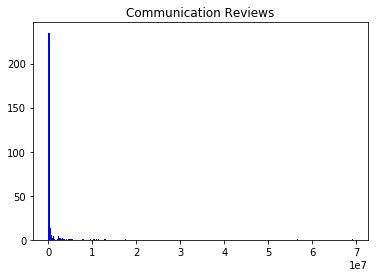

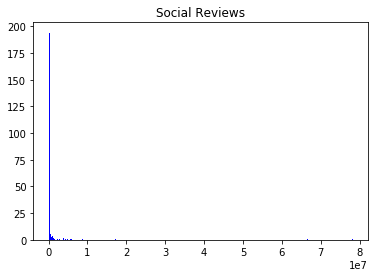

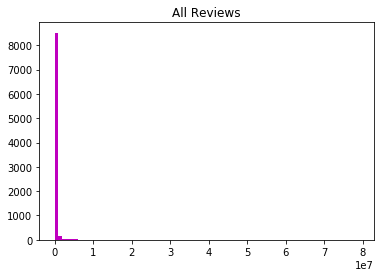

In [24]:
android_total_dict = {}
android_all_reviews = []
for app in android_data:
    genre = app[1]
    reviews = float(app[3])
    if reviews <= 100000000:
        android_all_reviews.append(reviews)
    if genre in android_total_dict:
        android_total_dict[genre].append(reviews)
    else:
        android_total_dict[genre] = [reviews]

width = 250000
plt.figure(6)
data = android_total_dict['COMMUNICATION']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'b')
plt.title('Communication Reviews')
plt.figure(7)
data = android_total_dict['SOCIAL']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'b')
plt.title('Social Reviews')

width = 1000000
plt.figure(8)
data = android_all_reviews
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'm')
plt.title('All Reviews')

Instead it still might be a safer bet to develop apps in the weather and books categories that we identified when analysing the App Store data. According to the Google Play dataset, apps in the *WEATHER* and *BOOK_AND_REFERENCE* categories have a sginificantly higher average number of reviews. Below are the distributions of reviews for these apps. Like is the case in general, the distributions are very skewed by outliers with many times more reveiws, but not to the extent of the social media apps.

Text(0.5, 1.0, 'Books and Reference Reviews')

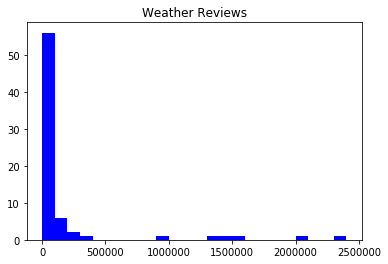

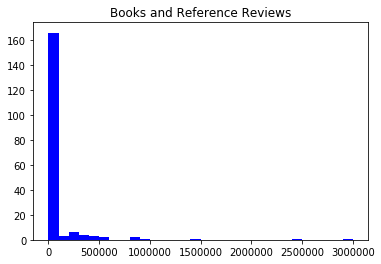

In [25]:
width = 100000
plt.figure(9)
data = android_total_dict['WEATHER']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'b')
plt.title('Weather Reviews')
plt.figure(10)
data = android_total_dict['BOOKS_AND_REFERENCE']
bins = plt.hist(data, bins = np.arange(0, max(data)+width, width), facecolor = 'b')
plt.title('Books and Reference Reviews')


While knowing which apps have the most reviews is important, and comparable to what we did for the App Store genres, we actually have more specific information regarding user activity for the Google Play apps. Recall that one of the columns in our dataset is the number of installs for each app on the market place. This is much more important than the number of reviews, becuase users often dowload and spend time on apps without leaving reviews. 

Since this field correlates more so with user activity, it will be valuable in identifying the popular app genres. We should note however that this field is not entirely accurate. The values listed are not specific numbers of downloads, but rather qualitative ranges such as 1000+, 50,000+, 10,000,000+, etc.. Exact figures are preferred, but for our purposes this will do just find. We do not need 100% accuracy and these ranges should still give us a good idea of which apps have more activity.

Below we write a function that converts these qualitative ranges into number values that can be used for calculations. For simplicity, and to err on the conservative side, we will just take the minimum values of each range. For example, '1,000+' would be converted to the number 1000, '50,000' to 50000, and so on. The function below takes as an input an string representing one of these qualitative ranges and returns the converted numerical value.

In [26]:
# Defining function that converts installs ranges to numerical values

def n_installs(string):
    return  float(string.replace(',','').replace('+',''))

print(n_installs('1,000+'))
print(n_installs('50,000+'))
print(n_installs('5,000,000+'))

1000.0
50000.0
5000000.0


Now that we have our conversion function, below we will define another function that calculates and prints the mean/stdev installs for each app category. This function will be a mirror image of our earlier `category_reviews` function with the only difference being that this function uses our `n_installs` function to convert the install values.

In [27]:
# Defining function to calculate average category installs

def category_installs(dataset, index_c, index_i):
    total_dict = {}                                 # Dictionary that stores list of app installs
    all_installs = []
    for app in dataset:
        genre = app[index_c]
        installs = n_installs(app[index_i])
        all_installs.append(installs)
        if genre in total_dict:
            total_dict[genre].append(installs)       # Appends installs for app in given category list
        else:
            total_dict[genre] = [installs]           # Initiates first instance of app in given genres
    
    mean_dict = {}                                                   # Dictionary that stores mean installs for each app
    for genre in total_dict:
        mean_dict[genre] = statistics.mean(total_dict[genre])        # Calculates mean installs
    
    stdev_dict = {}                                                  # Dictionary that stores stdev installs for each app
    for genre in total_dict:
        stdev_dict[genre] = statistics.stdev(total_dict[genre])      # Calculates stdev installs
    
    for genre in sorted(mean_dict, key = mean_dict.__getitem__, reverse = True):    # Prints table of mean/stdev installs
        mean = mean_dict[genre]
        stdev = stdev_dict[genre]
        print(genre,': ', mean, ', ', stdev)
        
    print('\nTotal: ', statistics.mean(all_installs), ', ', statistics.stdev(all_installs))  # Prints total mean/stdev
    

category_installs(android_data, 1, 5)

COMMUNICATION :  38456119.167247385 ,  156535434.1944795
VIDEO_PLAYERS :  24727872.452830188 ,  119083679.13045308
SOCIAL :  23253652.127118643 ,  121487218.58186153
PHOTOGRAPHY :  17840110.40229885 ,  66746732.754783124
PRODUCTIVITY :  16787331.344927534 ,  78217024.39351176
GAME :  15588015.603248259 ,  53678692.18477824
TRAVEL_AND_LOCAL :  13984077.710144928 ,  98594754.05841501
ENTERTAINMENT :  11640705.88235294 ,  24589566.544148996
TOOLS :  10801391.298666667 ,  57302281.4032744
NEWS_AND_MAGAZINES :  9549178.467741935 ,  77466427.87458485
BOOKS_AND_REFERENCE :  8767811.894736841 ,  73734224.2243508
SHOPPING :  7036877.311557789 ,  17732538.760688502
PERSONALIZATION :  5201482.6122448975 ,  17361589.145064857
WEATHER :  5074486.197183099 ,  11569259.580276068
HEALTH_AND_FITNESS :  4188821.9853479853 ,  31001849.35520195
MAPS_AND_NAVIGATION :  4056941.7741935486 ,  14072976.452390296
FAMILY :  3695641.8198090694 ,  26791299.78618048
SPORTS :  3638640.1428571427 ,  11204464.23490460

As one would expect, the same categories with more reviews are the same categories with more downloads, such as *COMMUNICATION*, *VIDEO_PLAYERS*, and *SOCIAL*. However, like we said before, we have reason to believe that these averages are being skewed heavily by a few very popular apps and that the markets are fairly competitive for these genres. It would still seem as if one of the more niche categories, either weather, books, or references, are the most promising. Just as one last double check, below are bar graphs of these categories and the frequency of app installs by range.

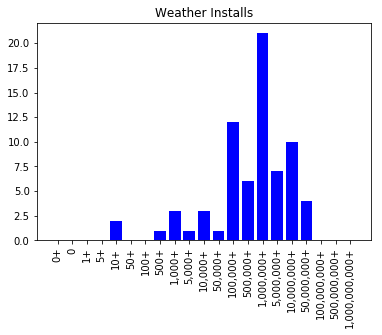

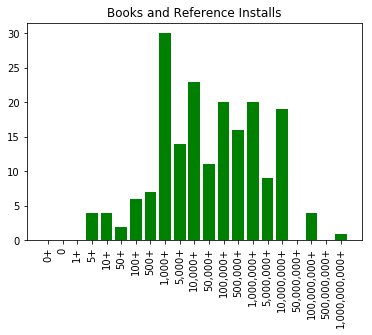

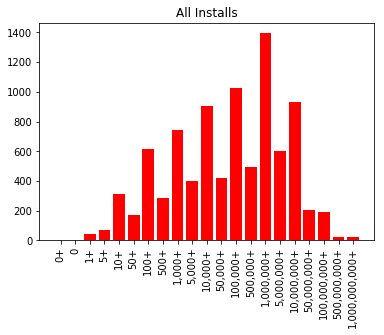

In [32]:
# Visualizing Google Play app installs using bar graphs

install_ranges = {}
for app in android_data:
    install_range = app[5]
    if install_range not in install_ranges:
        install_ranges[install_range] = 0

installs_dict = {'WEATHER': install_ranges.copy(), 'BOOKS_AND_REFERENCE': install_ranges.copy(), 'TOTAL': install_ranges.copy()}
#print(installs_dict)

for app in android_data:
    #print(installs_dict)
    category = app[1]
    install_range = app[5]
    installs_dict['TOTAL'][install_range] += 1
    for key in installs_dict:
        if category == key:
            installs_dict[key][install_range] += 1

x = np.arange(len(install_ranges))
labels = sorted(install_ranges, key = n_installs)
def y_values(labels, values_dict):
    y = []
    for key in labels:
        y.append(values_dict[key])
    return y

plt.figure(11)
plt.bar(x, y_values(labels, installs_dict['WEATHER']), facecolor = 'b')
plt.xticks(x, labels, rotation = 'vertical')
plt.title('Weather Installs')
plt.show()
plt.figure(12)
plt.bar(x, y_values(labels, installs_dict['BOOKS_AND_REFERENCE']), facecolor = 'g')
plt.xticks(x, labels, rotation = 'vertical')
plt.title('Books and Reference Installs')
plt.show()
plt.figure(13)
plt.bar(x, y_values(labels, installs_dict['TOTAL']), facecolor = 'r')
plt.xticks(x, labels, rotation = 'vertical')
plt.title('All Installs')
plt.show()


Comparing each of the distributions to the total, we see that the weather category is much more favorable. The books and reference category is fairly evenly distributed, but unfortunately centered at a lower installs bin range. On the other hand, weather category is centered at the 1,000,000+ installs bin range, which is even with if not more than the approximate center for all the apps. Furthermore, the average for this category is actually skewed down by a few apps in the lower ranges, such as 10+, 500+, etc.. Overall, this confirms that the weather category is the most promising app genre for development in the Google Play market thanks to a combination of low competition and popular demand for the few apps out there.

# Conclusions

In this project we have cleansed and analysed two sets of data regarding mobile apps available on the App Store and Google Play markets. To cleanse our data we removed incorrect data, duplicate records, non-English apps, and non free to dowload apps. Once our data was cleaned we began segmenting our data by genre with the aim of identifying those that are more popular and well received in each marketplace. Our goal in doing so was to find the types of apps that would be best for our company to market themselves. Using the frequency of genres, number of reviews, and number of installs, we were able to identify a few app categories in each dataset that have a history of low competition and high user activity. However, there was only one category that pasted all our requirements in both marketplaces, and this was the *Weather* genre. Based on our analysis, our company can take advantage of this niche area which experiences low saturation of apps yet relatively high demand for the ones that exist. Developing an app in this category is likely to drive consistent user activity and ad revenue as a result. 

If our company wishes to take a more bold approach, however, in the hopes of more profit, we might suggest developing a social media app. Across the board these apps have the potential for attracting the most users, on average and in the extreme cases, so this is the genre to be in for higher profits. However, this approach should be considered catiously as there is more risk involved. This category experiences more competition, though not as high as others (Ex. games), and many of the apps have little to no user activity.